#               Spooky Author Identification - Kaggle

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### A glance on the data & splitting it into train and validation sets

In [2]:
train_df = pd.read_csv('./Data/train.csv')

In [3]:
train_df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
train_df.shape

(19579, 3)

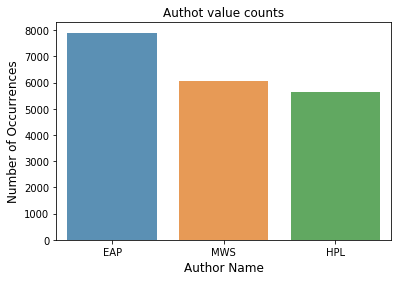

In [5]:
count_srs = train_df.author.value_counts()

sns.barplot(count_srs.index, count_srs.values, alpha=0.8)
plt.title('Authot value counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.show()

A slight imbalanced dataset.

In [12]:
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(train_df.author.values)

In [13]:
x_train, x_valid, y_train, y_valid = train_test_split(train_df['text'], y,
                                                      test_size=0.2,
                                                      stratify=y,
                                                      random_state=123)
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)

(15663,) (15663,) (3916,) (3916,)


### Basic Feature Engineering

Word count

In [ ]:
x_train["num_words"] = x_train["text"].apply(lambda x: len(str(x).split()))
x_valid["num_words"] = x_valid["text"].apply(lambda x: len(str(x).split()))

Unique word count

In [ ]:
x_train["num_unique_words"] = x_train["text"].apply(lambda x: len(set(str(x).split())))
x_valid["num_unique_words"] = x_valid["text"].apply(lambda x: len(set(str(x).split())))

Character count

In [ ]:
x_train["num_chars"] = x_train["text"].apply(lambda x: len(str(x)))
x_valid["num_chars"] = x_valid["text"].apply(lambda x: len(str(x)))

Stopword count

In [ ]:
eng_stopwords = set(stopwords.words("english"))

x_train["num_stopwords"] = x_train["text"].apply(lambda x: len([word for word in str(x).lower().split() if word in eng_stopwords]))
x_valid["num_stopwords"] = x_valid["text"].apply(lambda x: len([word for word in str(x).lower().split() if word in eng_stopwords]))

Punctuation count

In [ ]:
x_train["num_punctuations"] =x_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
x_valid["num_punctuations"] = x_valid['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

Upper Case words

In [ ]:
x_train["num_words_upper"] = x_train["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
x_valid["num_words_upper"] = x_valid["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

Average word length

In [ ]:
x_train["mean_word_len"] = x_train["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
x_valid["mean_word_len"] = x_valid["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#### Analysing the above features

In [ ]:
train_df.head()

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1,3,1)
sns.violinplot(x = 'author', y = 'num_words', data = train_df)
plt.subplot(1,3,2)
sns.violinplot(x = 'author', y = 'num_unique_words', data = train_df)
plt.subplot(1,3,3)
sns.violinplot(x = 'author', y = 'num_chars', data = train_df)
plt.show()

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1,3,1)
sns.violinplot(x = 'author', y = 'num_stopwords', data = train_df)
plt.subplot(1,3,2)
sns.violinplot(x = 'author', y = 'num_punctuations', data = train_df)
plt.subplot(1,3,3)
sns.violinplot(x = 'author', y = 'mean_word_len', data = train_df)
plt.show()

From the plots we can see that we do not a very good feature that can help us classify the texts.

### Text Based feature engineering

In [ ]:
# Fit transform the tfidf vectorizer
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
train_tfidf = tfidf_vec.fit_transform(train_df['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test_df['text'].values.tolist())

In [ ]:
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(train_df.author.values)

In [19]:
x_valid[272]

"As the sailor looked in, the gigantic animal had seized Madame L'Espanaye by the hair, which was loose, as she had been combing it, and was flourishing the razor about her face, in imitation of the motions of a barber."

In [9]:
y

array([0, 1, 0, ..., 0, 0, 1])